In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [7]:
# Example data points (replace these with your actual data)
x_data = np.array(list(range(9, 20)))*60*60
y_data = np.array([164, 403, 637, 851, 986, 1046, 1029, 936, 776, 569, 421])
print(len(x_data), len(y_data))


11 11


In [12]:

def weighted_std(values, weights):
    """
    Compute the weighted standard deviation.

    Parameters:
    values (array-like): The data values.
    weights (array-like): The weights for each data value.

    Returns:
    float: The weighted standard deviation.
    """
    # Convert to numpy arrays
    values = np.array(values)
    weights = np.array(weights)

    # Calculate the weighted mean
    weighted_mean = np.average(values, weights=weights)

    # Calculate the weighted variance
    weighted_variance = np.average((values - weighted_mean)**2, weights=weights)

    # Return the weighted standard deviation
    return np.sqrt(weighted_variance)

weighted_std(x_data, y_data)

9213.31907298643

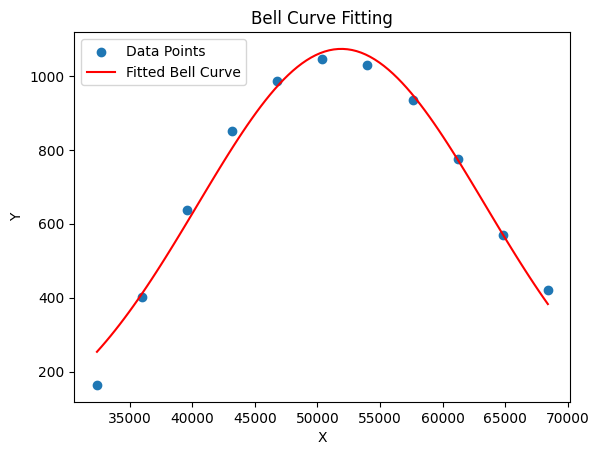

In [13]:

# Define the Gaussian function
def gaussian(x, a, b, c):
    return a * np.exp(-0.5 * ((x - b) / c)**2)

# Initial guess for the parameters [amplitude, mean, standard deviation]
initial_guess = [1046, 12*60*60, 9213]

# Perform the curve fitting
popt, pcov = curve_fit(gaussian, x_data, y_data, p0=initial_guess)

# Extract the optimal parameters
a_opt, b_opt, c_opt = popt

# Generate fitted curve data
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = gaussian(x_fit, a_opt, b_opt, c_opt)

# Plot the original data points and the fitted curve
plt.scatter(x_data, y_data, label='Data Points')
plt.plot(x_fit, y_fit, label='Fitted Bell Curve', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Bell Curve Fitting')
plt.show()


In [14]:
a_opt, b_opt, c_opt

(1073.0986825495552, 51908.73485807114, 11484.9497213533)

In [17]:
def solar_irradiance(time):
    return 1073.099 * np.exp(-0.5 * ((time - 51908.735) / 11484.950)**2)

def solar_irradiance_hrly(hr):
    time = hr*60*60
    return 1073.099 * np.exp(-0.5 * ((time - 51908.735) / 11484.950)**2)

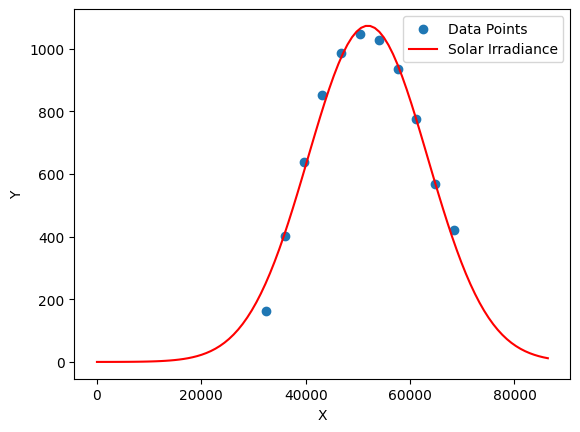

In [16]:
# Generate fitted curve data
x_plt = np.linspace(0, 24*60*60, 100)
y_plt = solar_irradiance(x_plt)

# Plot the original data points and the fitted curve
plt.scatter(x_data, y_data, label='Data Points')
plt.plot(x_plt, y_plt, label='Solar Irradiance', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

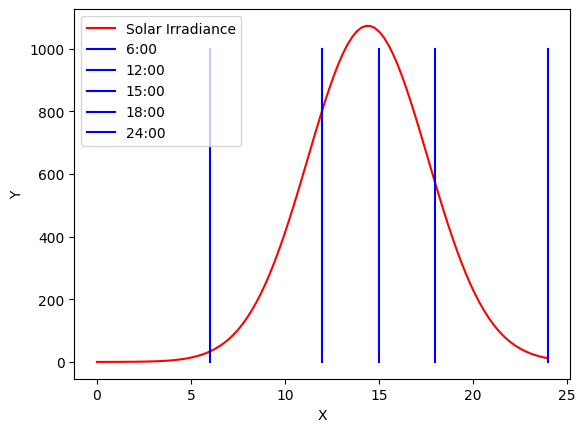

In [26]:
# Generate fitted curve data
x_plt = np.linspace(0, 24, 100)
y_plt = solar_irradiance_hrly(x_plt)

plt.plot(x_plt, y_plt, label='Solar Irradiance', color='red')
for i in (6, 12, 15, 18, 24):
    plt.plot([i, ]*6, [0, 200, 400, 600, 800, 1000], label=str(i)+":00", color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()